# Random Numbers and Probability

Having reviewed the basics of probability in class, we would like to see what it means for generating random numbers in python.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import special

We can do most of what we will need within the random sub-library of numpy. We can simply call the random number generator and ask for numbers as follow:

In [2]:
print(np.random.rand())
print(np.random.rand(5))

0.9628414823131028
[0.04809797 0.48486359 0.10463849 0.28045772 0.26763027]


From just a few numbers, you can probably guess what the distribution is, but to be safe, we will make a histogram:

In [3]:
sample=np.random.rand(int(1e6))

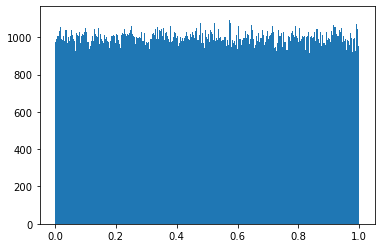

In [4]:
plt.hist(sample,bins=1000)
plt.show()

Random number generators are not actually random. Instead, they are just a map between a seed number that you put in and out output that is sufficiently complicated that it looks random to you. For example, we can pick the seed ourselves so that we always generate the same "random numbers" 

In [5]:
seed=101010
np.random.seed(seed)
print(np.random.rand())
print(np.random.rand())

0.3732286479430995
0.9856923292224101


For a simple example, consider the following function:

In [6]:
def my_random(a,b,seed_in):
    return a*seed_in%b

In [7]:
sample2=my_random(7**5,100319,np.arange(10000))

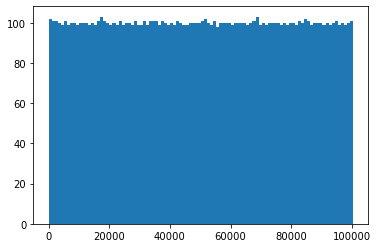

In [8]:
plt.hist(sample2,bins=100)
plt.show()

The idea is that the remainder after multiplying by a large number and dividing by a somewhat smaller but still large number is very difficult to predict if they are not multiples of each other. The result is that the remainder, for a predictable input is pretty close to a uniform random distribution of integers between 0 and $b-1$. Dividing by $b$ would convert this to a uniform distribution of numbers between 0 and 1

Given a uniform distribution between 0 and 1, we can get to any other uniform distribution just by add and multiplying. E.g. we can make a function that generates a uniform distribution from a to b by 

In [9]:
def my_uniform(a,b,N):
    temp=np.random.rand(N)
    return temp*(b-a)+a

In [10]:
sample3=my_uniform(19,47,10000)

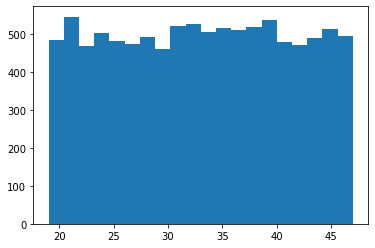

In [11]:
plt.hist(sample3,bins=20)
plt.show()

How about non-uniform distributions. We will generally want to use normally distributed numbers. Python can generate those too: 

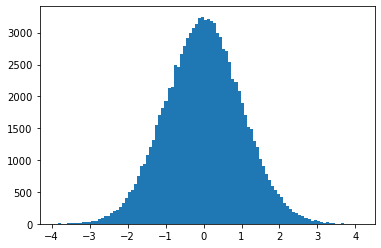

In [12]:
sample4=np.random.randn(100000)
plt.hist(sample4,bins=100)
plt.show()

There are many strategies for converging a uniform distribution into other types of distributions. One simple strategy works as follows

In [13]:
def my_normal(N):
    xtry=np.random.rand(N)*10-5 # pick N uniform numbers beyween -5 and 5
    yout=np.exp(-xtry**2/2) # calculate the distribution at that point
    ytry=np.random.rand(N) # pick a new uniform random number
    outlist=ytry<yout # keep the random number xtry only if ytry > yout
    return xtry[outlist]

In [14]:
sample5=my_normal(100000)
print(len(sample5))

25108


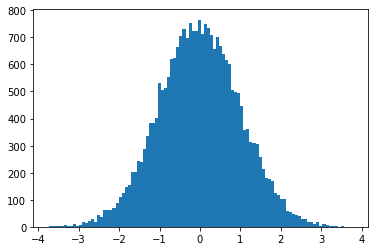

In [15]:
plt.hist(sample5,bins=100)
plt.show()

We can visualize what this function is doing as follows:  

In [16]:
def my_normal_data(N):
    xtry=np.random.rand(N)*10-5 # pick N uniform numbers beyween -5 and 5
    yout=np.exp(-xtry**2/2) # calculate the distribution at that point
    ytry=np.random.rand(N) # pick a new uniform random number
    outlist=ytry<yout # keep the random number xtry only if ytry > yout
    return xtry,ytry,outlist

In [17]:
xtry1,ytry1,outlist=my_normal_data(200)
xN=np.linspace(-5,5,100)
yN=np.exp(-xN**2/2)

In [18]:
color1=outlist*100

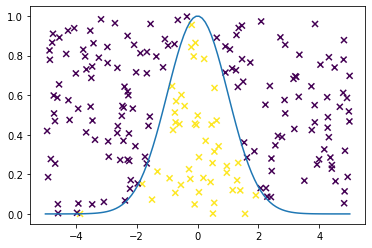

In [19]:
plt.scatter(xtry1,ytry1,c=color1,marker='x')
plt.plot(xN,yN)
plt.show()

Here all points marked with an x in the scatter plot represents uniformly distributed randomly chosen pairs of (x,y). The color indicates whether of not the $y$ value is larger or smaller than our distribution. The points below the curve were accepted values of $x$ drawn from the distribution.

# Simulated Data

### Coins

One immediate use of random number generators is to simulate data from random processes. For example, we could consider what happens when we flip a coin 1000 times and then repeat it over and over again to see the range of outcomes.

In [20]:
N_sims=1000
heads=np.zeros(N_sims)
for i in range(N_sims):
    heads[i]=np.random.randint(2,size=1000).sum()

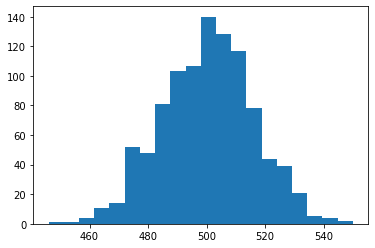

In [21]:
fig,ax=plt.subplots()
ax.hist(heads,bins=20)
plt.show()

We could also consider an uneven coin with $p=0.55$.

In [22]:
N_sims=1000
heads_p=np.zeros(N_sims)
for i in range(N_sims):
    heads_p[i]=(np.random.rand(1000) < 0.55).sum()/1000.   

In [23]:
norm=integrate.quad(lambda p:p**(550)*(1-p)**(450)*special.binom(1000,550),0,1)[0]
print(norm)

0.0009990009990011805


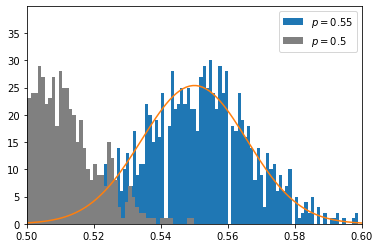

In [24]:
p_lin=np.linspace(0,1,1000)
fig,ax=plt.subplots()
ax.hist(heads_p,bins=100,label=r'$p=0.55$')
ax.hist(heads/1000,bins=100,color='grey',label=r'$p=0.5$')
ax.plot(p_lin,p_lin**(550)*(1-p_lin)**(450)*special.binom(1000,550)/norm)
ax.set_xlim(0.5,0.6)
ax.legend()
plt.show()

We see that directly simulating our coin flipping experiment reproduces exactly what we anticipated using Bayes' theorem.